In [1]:
#Function for displaying Binary Search Tree
import networkx as nx
import random

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

def displayTree(tree, root):
    edges = []
    for e in tree.getEdges(root):
        try:
            edges.append((e[0].value, e[1].value))
        except:
            continue
    
    G = nx.DiGraph()

    G.add_edges_from(edges)
    pos = hierarchy_pos(G, root.value)

    nx.draw(G, pos = pos, with_labels = True, font_size = 25, node_color = 'green')

In [2]:
#Node class
class Node(object): 
    def __init__(self, value): 
        self.value = value 
        self.left = None
        self.right = None
        self.height = 1

In [3]:
#Create a BST as base/for comparison to AVL
class BST():
    def getHeight(self, root): 
        if root == None:
            return 0
        else:
            return root.height

    def getMaxHeight(self, root):
        return max(self.getHeight(root.left), self.getHeight(root.right))

    def getEdges(self,root):
        edge_list = []
        if root == None:
            return edge_list
        
        if type(root.left) != 'NoneType':
            left_edge = (root, root.left)
            edge_list.append(left_edge)
        if type(root.right) != 'NoneType':
            right_edge = (root, root.right)
            edge_list.append(right_edge)
        
        edge_list += self.getEdges(root.left)
        edge_list += self.getEdges(root.right)
        
        return edge_list


    def getPreorderTraversal(self, root): 
        node_list = []

        if root:
            node_list.append(root.value)
            node_list += self.getPreorderTraversal(root.left)
            node_list += self.getPreorderTraversal(root.right) 

        else:
            return node_list

        return node_list


    def insertValue(self, root, insert_value): 
        if root == None: 
            return Node(insert_value) 
        elif insert_value < root.value: 
            root.left = self.insertValue(root.left, insert_value) 
        else: 
            root.right = self.insertValue(root.right, insert_value) 

        root.height = 1 + self.getMaxHeight(root)
        return root 
  


In [4]:
#AVL Tree class        
class AVL(BST):
    #Initiate Binary Search Tree Class
    def __init__(self):
        super().__init__()

    #define rotate functions
    #rotate functions
    def rotateRight(self, n): 
        previous_left = n.left
        new_left = previous_left.right
        previous_left.right = n
        n.left = new_left
  
        n.height = 1 + self.getMaxHeight(n)
        previous_left.height = 1 + self.getMaxHeight(previous_left)

        return previous_left

    def rotateLeft(self, n):   
        previous_right = n.right
        new_right = previous_right.left
        previous_right.left = n
        n.right = new_right

        n.height = 1 + self.getMaxHeight(n)
        previous_right.height = 1 + self.getMaxHeight(previous_right)

        return previous_right

    #update insertValue to implemnt AVL algorithm
    def insertValue(self, root, insert_value):
        #insert value as if normal BST
        root = super().insertValue(root, insert_value)

        #AVL algorithm 
        #check to see if the tree needs rebalancing
        #left height is more than 1 additional branch higher than right.  rotate offending subtree right
        if (self.getHeight(root.left) - self.getHeight(root.right)) > 1:
            #if true left-right, else right
            if insert_value > root.left.value:
                root.left = self.rotateLeft(root.left)
            return self.rotateRight(root)

        #if balance is less than -1 - if right height is more than 1 additional branch higher than left height.  rotate offending subtree left
        if (self.getHeight(root.left) - self.getHeight(root.right) )< -1:
            #if true, right-left, else left
            if insert_value < root.right.value:
                root.right = self.rotateRight(root.right)
            return self.rotateLeft(root)

        return root 
  

          

In [5]:
import time
from random import randint
import numpy as np


def buildInitialAVLTree(initial_values):
    tree = AVL()
    root = None

    for v in initial_values:
        root = tree.insertValue(root, v)
    return tree, root

def buildInitialBSTTree(initial_values):
    tree = BST()
    root = None

    for v in initial_values:
        root = tree.insertValue(root, v)
    return tree, root


def treeSearch(search_value, tree, root, count = 0):
    if search_value == root.value:
        count +=1
    elif search_value > root.value:
        count+=1
        try:
            count = treeSearch(search_value, tree, root.right, count)
        except:
            pass
    elif search_value < root.value:
        count+=1
        try:
            count = treeSearch(search_value, tree, root.left, count)
        except:
            pass
    return count
    

In [6]:
values_to_insert = [10, 20, 30, 40, 50,25]

AVL_Tree, AVL_TreeRoot = buildInitialAVLTree(values_to_insert)
displayTree(AVL_Tree, AVL_TreeRoot)

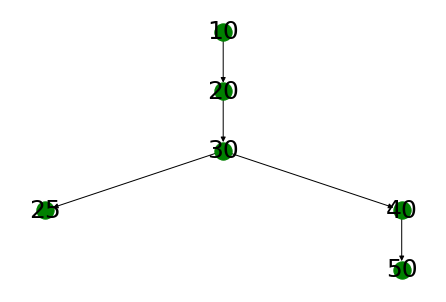

In [7]:
BST_Tree, BST_TreeRoot = buildInitialBSTTree(values_to_insert)
displayTree(BST_Tree, BST_TreeRoot)

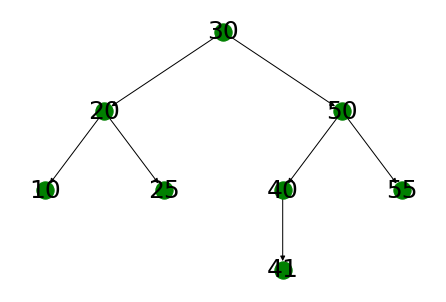

In [8]:
AVL_TreeRoot = AVL_Tree.insertValue(AVL_TreeRoot, 55)
AVL_TreeRoot = AVL_Tree.insertValue(AVL_TreeRoot, 41)

displayTree(AVL_Tree, AVL_TreeRoot)

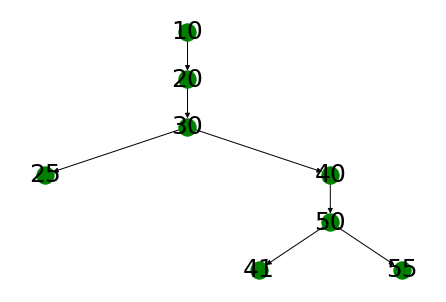

In [9]:
BST_TreeRoot = BST_Tree.insertValue(BST_TreeRoot, 55)
BST_TreeRoot = BST_Tree.insertValue(BST_TreeRoot, 41)

displayTree(BST_Tree, BST_TreeRoot)

Tests:  Average time to construct a tree of N node (similar to HW), Average time to find all items in the tree of N nodes, with worst and best times presented, Average height of tree of N nodes.   Comparison of true random to mostly sorted

In [10]:
#Tests - average time to construct, average time to find all items in the tree, worst case scenario to find value, average tree height
import time
from random import randint
import numpy as np

tests_per_size = 10
current_size = 8
max_size = 131072

def BST_test(test_array):
    start = time.time()
    BST_Tree, BST_TreeRoot = buildInitialBSTTree(test_array)
    end = time.time()
    return BST_Tree, BST_TreeRoot, (end - start)

def AVL_test(test_array):
    start = time.time()
    AVL_Tree, AVL_TreeRoot = buildInitialAVLTree(test_array)
    end = time.time()
    return AVL_Tree, AVL_TreeRoot, (end - start)

def treeTest(current_size, tests_per_size):
    BST_time = 0
    AVL_time = 0
    BST_search_count = []
    AVL_search_count = []
    BST_height = []
    AVL_height = []
    for i in range(tests_per_size):
        test_array = [randint(0,1000000) for i in range(current_size)]
        BST_Tree, BST_TreeRoot, BST_build_time = BST_test(test_array)
        BST_height.append(BST_Tree.getHeight(BST_TreeRoot))
        AVL_Tree, AVL_TreeRoot, AVL_build_time = AVL_test(test_array)
        AVL_height.append(AVL_Tree.getHeight(AVL_TreeRoot))
        BST_time += BST_build_time
        AVL_time += AVL_build_time
        for j in test_array:
            BST_search_count.append(treeSearch(j, BST_Tree, BST_TreeRoot))
            AVL_search_count.append(treeSearch(j, AVL_Tree, AVL_TreeRoot))

    return BST_time / tests_per_size, AVL_time / tests_per_size, BST_search_count, AVL_search_count, BST_height, AVL_height, 


while current_size <= max_size:
    avg_BST_build_time, avg_AVL_build_time, BST_search_count, AVL_search_count, BST_height, AVL_height = treeTest(current_size, tests_per_size)
    
    print(f'Average time to construct a BST of {current_size}:  {avg_BST_build_time: 0.5f}')
    print(f'Average number of comparisons to find value in BST Tree: {np.mean(BST_search_count): 0.3f}')
    BST_search_count.sort()
    print(f'worst case scenario for number of comparisons to find value in BST Tree: {BST_search_count[-1]}')
    print(f'Average height for a BST: {np.mean(BST_height): 0.1f}\n')
    print(f'Average time to construct a AVL of {current_size}:  {avg_AVL_build_time: 0.5f}')
    print(f'Average number of comparisons to find value in AVL Tree: {np.mean(AVL_search_count): 0.3f}')
    AVL_search_count.sort()
    print(f'worst case scenario for number of comparisons to find value in AVL Tree: {AVL_search_count[-1]}')
    print(f'Average height for a BST: {np.mean(AVL_height): 0.1f}\n\n')
    current_size *= 2


Average time to construct a BST of 8:   0.00000
Average number of comparisons to find value in BST Tree:  2.950
worst case scenario for number of comparisons to find value in BST Tree: 6
Average height for a BST:  4.6

Average time to construct a AVL of 8:   0.00020
Average number of comparisons to find value in AVL Tree:  2.700
worst case scenario for number of comparisons to find value in AVL Tree: 4
Average height for a BST:  4.0


Average time to construct a BST of 16:   0.00010
Average number of comparisons to find value in BST Tree:  4.231
worst case scenario for number of comparisons to find value in BST Tree: 8
Average height for a BST:  7.2

Average time to construct a AVL of 16:   0.00024
Average number of comparisons to find value in AVL Tree:  3.469
worst case scenario for number of comparisons to find value in AVL Tree: 5
Average height for a BST:  5.0


Average time to construct a BST of 32:   0.00048
Average number of comparisons to find value in BST Tree:  5.072
worst c

AttributeError: 'NoneType' object has no attribute 'right'

In [223]:
import cProfile

In [229]:
cProfile.run('treeTest(2**16,10)')

197685892 function calls (143792269 primitive calls) in 91.994 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1310720    0.547    0.000    0.547    0.000 <ipython-input-180-ce02904ef6d8>:3(__init__)
 87695200   12.839    0.000   12.839    0.000 <ipython-input-212-01c6a9df6a13>:3(getHeight)
23608375/1310720   20.550    0.000   73.266    0.000 <ipython-input-212-01c6a9df6a13>:44(insertValue)
 23215631   16.267    0.000   32.412    0.000 <ipython-input-212-01c6a9df6a13>:9(getMaxHeight)
   229945    0.209    0.000    0.734    0.000 <ipython-input-213-e99b9c93efaa>:19(rotateLeft)
       10    0.000    0.000    0.000    0.000 <ipython-input-213-e99b9c93efaa>:3(__init__)
10392708/655360   15.326    0.000   46.037    0.000 <ipython-input-213-e99b9c93efaa>:31(insertValue)
   229043    0.212    0.000    0.734    0.000 <ipython-input-213-e99b9c93efaa>:8(rotateRight)
       10    0.185    0.019   28.789    2.879 <ipython-input-214-a

In [9]:
print("Sorted Array Test\n\n")

import time
from random import randint
import numpy as np

tests_per_size = 10
current_size = 8
max_size = 2048

def BST_test_sorted(test_array):
    start = time.time()
    BST_Tree, BST_TreeRoot = buildInitialBSTTree(test_array)
    end = time.time()
    return BST_Tree, BST_TreeRoot, (end - start)

def AVL_test_sorted(test_array):
    start = time.time()
    AVL_Tree, AVL_TreeRoot = buildInitialAVLTree(test_array)
    end = time.time()
    return AVL_Tree, AVL_TreeRoot, (end - start)

def treeTestSorted(current_size, tests_per_size):
    BST_time = 0
    AVL_time = 0
    BST_search_count = []
    AVL_search_count = []
    BST_height = []
    AVL_height = []
    for i in range(tests_per_size):
        test_array = sorted([randint(0,1000000) for i in range(current_size)], key = lambda x: x, reverse = False)
        BST_Tree, BST_TreeRoot, BST_build_time = BST_test_sorted(test_array)
        BST_height.append(BST_Tree.getHeight(BST_TreeRoot))
        AVL_Tree, AVL_TreeRoot, AVL_build_time = AVL_test_sorted(test_array)
        AVL_height.append(AVL_Tree.getHeight(AVL_TreeRoot))
        BST_time += BST_build_time
        AVL_time += AVL_build_time
        for j in test_array:
            BST_search_count.append(treeSearch(j, BST_Tree, BST_TreeRoot))
            AVL_search_count.append(treeSearch(j, AVL_Tree, AVL_TreeRoot))

    return BST_time / tests_per_size, AVL_time / tests_per_size, BST_search_count, AVL_search_count, BST_height, AVL_height, 


while current_size <= max_size:
    avg_BST_build_time, avg_AVL_build_time, BST_search_count, AVL_search_count, BST_height, AVL_height = treeTestSorted(current_size, tests_per_size)
    
    print(f'Average time to construct a BST of {current_size}:  {avg_BST_build_time: 0.5f}')
    print(f'Average number of comparisons to find value in BST Tree: {np.mean(BST_search_count): 0.3f}')
    BST_search_count.sort()
    print(f'worst case scenario for number of comparisons to find value in BST Tree: {BST_search_count[-1]}')
    print(f'Average height for a BST: {np.mean(BST_height): 0.1f}\n')
    print(f'Average time to construct a AVL of {current_size}:  {avg_AVL_build_time: 0.5f}')
    print(f'Average number of comparisons to find value in AVL Tree: {np.mean(AVL_search_count): 0.3f}')
    AVL_search_count.sort()
    print(f'worst case scenario for number of comparisons to find value in AVL Tree: {AVL_search_count[-1]}')
    print(f'Average height for a BST: {np.mean(AVL_height): 0.1f}\n\n')
    current_size *= 2

Sorted Array Test


Average time to construct a BST of 8:   0.00010
Average number of comparisons to find value in BST Tree:  4.500
worst case scenario for number of comparisons to find value in BST Tree: 8
Average height for a BST:  8.0

Average time to construct a AVL of 8:   0.00010
Average number of comparisons to find value in AVL Tree:  2.625
worst case scenario for number of comparisons to find value in AVL Tree: 4
Average height for a BST:  4.0


Average time to construct a BST of 16:   0.00025
Average number of comparisons to find value in BST Tree:  8.500
worst case scenario for number of comparisons to find value in BST Tree: 16
Average height for a BST:  16.0

Average time to construct a AVL of 16:   0.00030
Average number of comparisons to find value in AVL Tree:  3.375
worst case scenario for number of comparisons to find value in AVL Tree: 5
Average height for a BST:  5.0


Average time to construct a BST of 32:   0.00095
Average number of comparisons to find value in BS